<a href="https://colab.research.google.com/github/Shambhurajdesai/Capstone---1-Hotel-Booking-Analysis/blob/main/Copy_of_Hotel_Bookings_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



1. is_canceled > sum(countries) > the country which has more than 1000 canceled bookings > assigned class of booking
2. stays_week_night > the adults > are they carrying childs or babies
3. is repeated guest > assigned class matters for them
4. total_spl_request > class they belongs
5. required_car_parking_spaces.count ~ country > so they prefer no car to reachout the hotel


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# mount the google drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [44]:
df_ = pd.read_csv('/content/drive/MyDrive/Hotel Bookings.csv')
# =pd.read_csv(file_path,index_col=0)
df_

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [ ]:
df_.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
df_[df_.duplicated()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,...,No Deposit,250.0,NaN,0,Transient,84.67,0,1,Check-Out,2015-07-07
43,Resort Hotel,0,70,2015,July,27,2,2,3,2,...,No Deposit,250.0,NaN,0,Transient,137.00,0,1,Check-Out,2015-07-07
138,Resort Hotel,1,5,2015,July,28,5,1,0,2,...,No Deposit,240.0,NaN,0,Transient,97.00,0,0,Canceled,2015-07-01
200,Resort Hotel,0,0,2015,July,28,7,0,1,1,...,No Deposit,240.0,NaN,0,Transient,109.80,0,3,Check-Out,2015-07-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119349,City Hotel,0,186,2017,August,35,31,0,3,2,...,No Deposit,9.0,NaN,0,Transient,126.00,0,2,Check-Out,2017-09-03
119352,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119353,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119354,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03


In [ ]:
df_.isnull().sum().sort_values(ascending=False)

company                           112593
agent                              16340
country                              488
children                               4
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
hotel                                  0
previous_cancellations                 0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
previous_bookings_not_canceled         0
is_repeated_guest                      0
is_canceled                            0
distribution_channel                   0
market_segment                         0
meal                                   0
babies                                 0
adults                                 0
stays_in_week_ni

In [ ]:
df_.drop(columns=['company'])

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,0,No Deposit,394.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,0,No Deposit,9.0,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,0,No Deposit,9.0,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,0,No Deposit,89.0,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [ ]:
df_['country'].mode()

0    PRT
dtype: object

In [ ]:
df_.loc[df_['country']=='PRT','country'].count()

48590

In [ ]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
country = df_['country'].value_counts()
country

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: country, Length: 177, dtype: int64

In [ ]:
is_canceled = df_.loc[df_['is_canceled']==1,'is_canceled'].value_counts()
is_canceled

1    44224
Name: is_canceled, dtype: int64

44157

In [ ]:
df_.isna()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
119386,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
119387,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
119388,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [ ]:
res = df_['reserved_room_type'].value_counts()
res

A    85994
D    19201
E     6535
F     2897
G     2094
B     1118
C      932
H      601
P       12
L        6
Name: reserved_room_type, dtype: int64

In [ ]:
as_ = df_['assigned_room_type'].value_counts()
as_

A    74053
D    25322
E     7806
F     3751
G     2553
C     2375
B     2163
H      712
I      363
K      279
P       12
L        1
Name: assigned_room_type, dtype: int64

In [ ]:
booking_c = df_['booking_changes']
booking_c

0         3
1         4
2         0
3         0
4         0
         ..
119385    0
119386    0
119387    0
119388    0
119389    0
Name: booking_changes, Length: 119390, dtype: int64

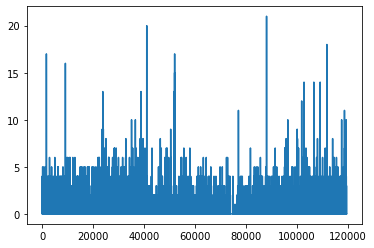

In [ ]:
plt.plot(booking_c)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
as_res = pd.DataFrame([res,as_])
as_res

,A,D,E,F,G,B,C,H,P,L,I,K
reserved_room_type,85994.0,19201.0,6535.0,2897.0,2094.0,1118.0,932.0,601.0,12.0,6.0,NaN,NaN
assigned_room_type,74053.0,25322.0,7806.0,3751.0,2553.0,2163.0,2375.0,712.0,12.0,1.0,363.0,279.0


In [ ]:
as_res1 = df_.groupby(['reserved_room_type','assigned_room_type'])['reservation_status_date'].count().unstack()
as_res1

assigned_room_type,A,B,C,D,E,F,G,H,I,K,L,P
reserved_room_type,,,,,,,,,,,,
A,73598.0,1123.0,1447.0,7548.0,1156.0,417.0,186.0,94.0,215.0,210.0,NaN,NaN
B,111.0,988.0,NaN,5.0,2.0,2.0,8.0,NaN,NaN,2.0,NaN,NaN
C,5.0,2.0,883.0,6.0,4.0,2.0,10.0,10.0,10.0,NaN,NaN,NaN
D,312.0,27.0,34.0,17736.0,686.0,204.0,82.0,9.0,67.0,44.0,NaN,NaN
E,15.0,3.0,8.0,22.0,5923.0,404.0,100.0,4.0,40.0,16.0,NaN,NaN
F,6.0,17.0,NaN,4.0,31.0,2707.0,116.0,3.0,10.0,3.0,NaN,NaN
G,5.0,2.0,2.0,NaN,4.0,14.0,2041.0,7.0,15.0,4.0,NaN,NaN
H,NaN,NaN,NaN,1.0,NaN,NaN,10.0,584.0,6.0,NaN,NaN,NaN
L,1.0,1.0,1.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,1.0,NaN


In [ ]:
as_res1.columns

Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'P'], dtype='object', name='assigned_room_type')

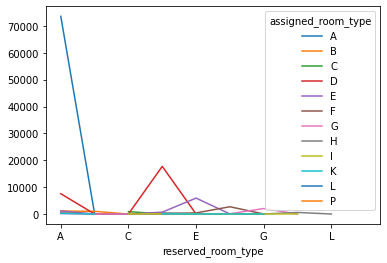

In [ ]:
as_res1.plot()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


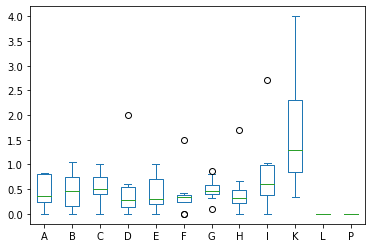

In [ ]:
df_.groupby(['reserved_room_type', 'assigned_room_type'])['booking_changes'].mean().unstack().plot(kind="box")
# plt.title('House Price distribution by Property Type')
# plt.ylabel('Daily Average Prices')
# plt.xlabel('Property Type')

In [ ]:
type_ = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'P']
data = res
fig = plt.figure(figsize = (10,7))
plt.pie(data,type_)


In [ ]:
baby = df_['babies'].value_counts()
baby

0     118473
1        900
2         15
10         1
9          1
Name: babies, dtype: int64

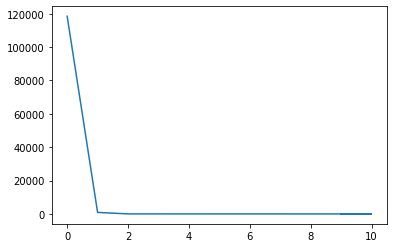

In [ ]:
plt.plot(baby)

In [ ]:
adults = df_['adults'].value_counts()
adults

2     89680
1     23027
3      6202
0       403
4        62
26        5
27        2
20        2
5         2
40        1
50        1
55        1
6         1
10        1
Name: adults, dtype: int64

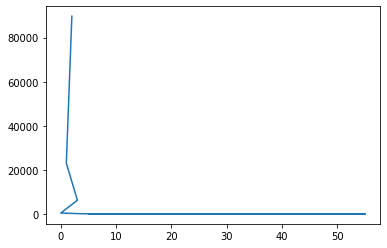

In [ ]:
plt.plot(adults)

In [ ]:
child = df_['children'].value_counts()
child

0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: children, dtype: int64

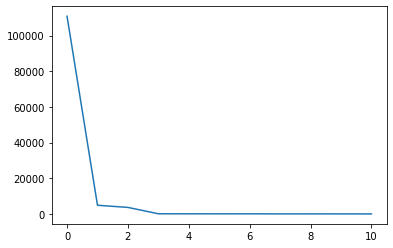

In [ ]:
plt.plot(child)

In [ ]:
stay_in_week_night = df_['stays_in_week_nights']

In [ ]:
import seaborn as sns

In [ ]:
month = df_['arrival_date_month']
month

0           July
1           July
2           July
3           July
4           July
           ...  
119385    August
119386    August
119387    August
119388    August
119389    August
Name: arrival_date_month, Length: 119390, dtype: object

In [ ]:
# month[]

(array([26538., 10508., 11160.,  6794.,  6780.,  5929.,  8068.,  9794.,
        11089., 22730.]),
 array([ 0. ,  1.1,  2.2,  3.3,  4.4,  5.5,  6.6,  7.7,  8.8,  9.9, 11. ]),
 <a list of 10 Patch objects>)

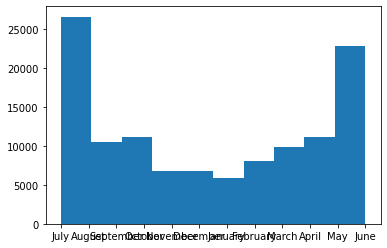

In [ ]:
plt.hist(month)

In [ ]:
# plt.pie(month)

In [ ]:
m = df_['arrival_date_month'].value_counts()

In [ ]:
m['July']

12661

In [ ]:
total_sp_re = df_['total_of_special_requests'].value_counts()
total_sp_re

0    70318
1    33226
2    12969
3     2497
4      340
5       40
Name: total_of_special_requests, dtype: int64

In [ ]:
total_sp_re.sort_index(inplace=True)
total_sp_re

0    70318
1    33226
2    12969
3     2497
4      340
5       40
Name: total_of_special_requests, dtype: int64

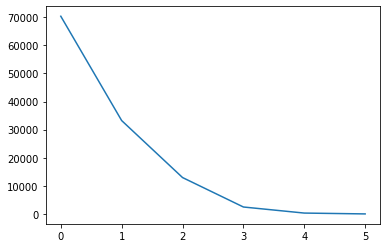

In [ ]:
plt.plot(total_sp_re)

(array([3., 1., 0., 0., 1., 0., 0., 0., 0., 1.]),
 array([4.00000e+01, 7.06780e+03, 1.40956e+04, 2.11234e+04, 2.81512e+04,
        3.51790e+04, 4.22068e+04, 4.92346e+04, 5.62624e+04, 6.32902e+04,
        7.03180e+04]),
 <a list of 10 Patch objects>)

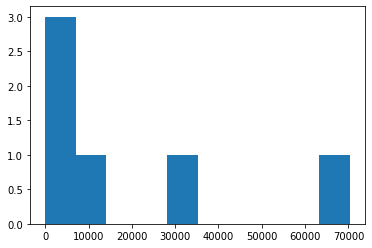

In [ ]:
plt.hist(total_sp_re)

In [ ]:
a = df_.groupby('total_of_special_requests')['assigned_room_type'].count().reset_index()
a

,total_of_special_requests,assigned_room_type
0,0,70318
1,1,33226
2,2,12969
3,3,2497
4,4,340
5,5,40


In [ ]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


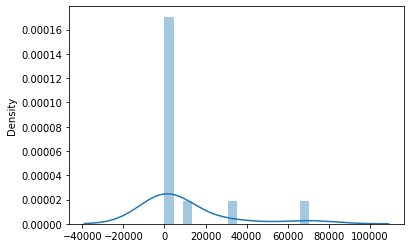

In [ ]:
sns.distplot(a,hist=True)

In [7]:
df_['stays_in_weekend_nights'].value_counts().reset_index

<bound method Series.reset_index of 0     51998
2     33308
1     30626
4      1855
3      1259
6       153
5        79
8        60
7        19
9        11
10        7
12        5
13        3
16        3
14        2
18        1
19        1
Name: stays_in_weekend_nights, dtype: int64>

In [26]:
df_['adults'].value_counts().reset_index

<bound method Series.reset_index of 2     89680
1     23027
3      6202
0       403
4        62
26        5
27        2
20        2
5         2
40        1
50        1
55        1
6         1
10        1
Name: adults, dtype: int64>

In [25]:
a = df_[(df_['stays_in_weekend_nights']>=1) & (df_['adults']>=2)]

In [31]:
a1 = a[(a['stays_in_weekend_nights']<=10) & (a['adults']<=5)]
a1

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
21,Resort Hotel,0,72,2015,July,27,1,2,4,2,...,No Deposit,250.0,NaN,0,Transient,84.67,0,1,Check-Out,2015-07-07
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,...,No Deposit,250.0,NaN,0,Transient,84.67,0,1,Check-Out,2015-07-07
23,Resort Hotel,0,72,2015,July,27,1,2,4,2,...,No Deposit,250.0,NaN,0,Transient,99.67,0,1,Check-Out,2015-07-07
24,Resort Hotel,0,127,2015,July,27,1,2,5,2,...,No Deposit,115.0,NaN,0,Contract,94.95,0,1,Check-Out,2015-07-01
25,Resort Hotel,0,78,2015,July,27,1,2,5,2,...,No Deposit,5.0,NaN,0,Transient,63.60,1,0,Check-Out,2015-07-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [32]:
df_stays_at_weekend = a1[['stays_in_weekend_nights','adults']]
df_stays_at_weekend

,stays_in_weekend_nights,adults
21,2,2
22,2,2
23,2,2
24,2,2
25,2,2
...,...,...
119385,2,2
119386,2,3
119387,2,2
119388,2,2


In [37]:
a2 = df_stays_at_weekend[(df_stays_at_weekend['stays_in_weekend_nights']>=2) & (df_stays_at_weekend['adults']>=2)]
a2

,stays_in_weekend_nights,adults
21,2,2
22,2,2
23,2,2
24,2,2
25,2,2
...,...,...
119385,2,2
119386,2,3
119387,2,2
119388,2,2


In [71]:
repeated=df_[(df_['is_repeated_guest']==1)]


In [79]:
df_[(df_['is_repeated_guest']>=1) & (df_['assigned_room_type']=='A') & (df_['reserved_room_type']=='A')]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
14681,Resort Hotel,1,202,2015,July,30,22,2,5,2,...,No Deposit,156.0,NaN,0,Contract,90.95,0,0,Canceled,2015-01-01
14817,Resort Hotel,1,202,2015,September,36,1,2,8,2,...,No Deposit,156.0,NaN,0,Contract,55.68,0,1,Canceled,2015-02-11
14826,Resort Hotel,1,137,2015,July,29,13,2,5,2,...,No Deposit,250.0,NaN,0,Transient,8.00,0,0,Canceled,2015-02-26
14854,Resort Hotel,1,207,2015,September,39,26,1,1,2,...,No Deposit,208.0,NaN,0,Transient,34.00,0,0,Canceled,2015-03-03
14855,Resort Hotel,1,207,2015,September,39,26,1,1,2,...,No Deposit,208.0,NaN,0,Transient,34.00,0,0,Canceled,2015-03-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117319,City Hotel,0,5,2017,August,32,7,1,1,1,...,No Deposit,NaN,40.0,0,Transient,67.00,1,1,Check-Out,2017-08-09
117424,City Hotel,0,3,2017,August,35,31,0,1,2,...,No Deposit,NaN,40.0,0,Transient,95.00,0,4,Check-Out,2017-09-01
117701,City Hotel,0,0,2017,August,32,8,0,0,2,...,No Deposit,262.0,NaN,0,Transient,0.00,0,0,Check-Out,2017-08-08
117841,City Hotel,0,7,2017,August,35,30,0,2,1,...,No Deposit,NaN,40.0,0,Transient,65.00,0,2,Check-Out,2017-09-01


In [86]:
df_[(df_['stays_in_weekend_nights']==0) & (df_['total_of_special_requests']>2)]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
12,Resort Hotel,0,68,2015,July,27,1,0,4,2,...,No Deposit,240.0,NaN,0,Transient,97.00,0,3,Check-Out,2015-07-05
15,Resort Hotel,0,68,2015,July,27,1,0,4,2,...,No Deposit,240.0,NaN,0,Transient,97.00,0,3,Check-Out,2015-07-05
198,Resort Hotel,0,0,2015,July,28,7,0,1,1,...,No Deposit,240.0,NaN,0,Transient,109.80,0,3,Check-Out,2015-07-08
200,Resort Hotel,0,0,2015,July,28,7,0,1,1,...,No Deposit,240.0,NaN,0,Transient,109.80,0,3,Check-Out,2015-07-08
230,Resort Hotel,0,17,2015,July,28,9,0,1,2,...,No Deposit,242.0,NaN,0,Transient,123.00,0,3,Check-Out,2015-07-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119280,City Hotel,0,30,2017,August,35,30,0,3,3,...,No Deposit,7.0,NaN,0,Transient,195.47,0,3,Check-Out,2017-09-02
119289,City Hotel,0,25,2017,August,35,30,0,3,3,...,No Deposit,9.0,NaN,0,Transient,236.33,0,3,Check-Out,2017-09-02
119293,City Hotel,0,243,2017,August,35,30,0,3,2,...,No Deposit,9.0,NaN,0,Transient,189.00,0,3,Check-Out,2017-09-02
119334,City Hotel,0,325,2017,August,35,30,0,4,2,...,No Deposit,9.0,NaN,0,Transient,129.18,0,4,Check-Out,2017-09-03


In [84]:
df_['total_of_special_requests']

0         0
1         0
2         0
3         0
4         1
         ..
119385    0
119386    2
119387    4
119388    0
119389    2
Name: total_of_special_requests, Length: 119390, dtype: int64

In [100]:
res = df_['reserved_room_type'].value_counts()
res

A    85994
D    19201
E     6535
F     2897
G     2094
B     1118
C      932
H      601
P       12
L        6
Name: reserved_room_type, dtype: int64

In [104]:
as_ = df_['assigned_room_type'].value_counts().reset_index()
as_

,index,assigned_room_type
0,A,74053
1,D,25322
2,E,7806
3,F,3751
4,G,2553
5,C,2375
6,B,2163
7,H,712
8,I,363
9,K,279
